# DSE 5002 Project 1

Peter Gyorda
April 12 ,2025

We will be analyzing salaries for data scientists and be doing the analysis with pandas and seaborn.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [97]:
import os

os.getcwd()

'C:\\Users\\petea'

In [98]:
# First, install the required PostgreSQL adapter
!pip install psycopg2-binary

#import psycopg2
import sqlalchemy

In [99]:
df = pd.read_csv("r project data-1.csv")

num_rows = df.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 607 rows.


In [100]:

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [101]:
import pandas as pd

def analyze_data_types(csv_file):
    """
    Loads a CSV file and prints the data type of each column.

    Args:
        csv_file (str): Path to the CSV file.
    """
    try:
        df = pd.read_csv(csv_file)
        print("Data Categories and Their Types:")
        print("-" * 30)
        for column in df.columns:
            data_type = df[column].dtype
            print(f"{column}: {data_type}")
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace 'r project data-1.csv' with your actual file path)
analyze_data_types("r project data-1.csv")

Data Categories and Their Types:
------------------------------
Unnamed: 0: int64
work_year: int64
experience_level: object
employment_type: object
job_title: object
salary: int64
salary_currency: object
salary_in_usd: int64
employee_residence: object
remote_ratio: int64
company_location: object
company_size: object


In [102]:
def convert_to_categorical(csv_file, categories_and_types):
    try:
        # Import pandas library
        import pandas as pd
        
        # Read the CSV file
        df = pd.read_csv(csv_file)
        
        # Print original data types
        print("Original Data Types:")
        print("-" * 30)
        for column in df.columns:
            print(f"{column}: {df[column].dtype}")

        # Columns to convert to factors (categorical)
        columns_to_convert = [
            'experience_level',
            'employment_type',
            'job_title',
            'salary_currency',
            'employee_residence',
            'company_location',
            'company_size'
        ]

        # Convert specified columns to factors (categorical)
        for column in columns_to_convert:
            if column in df.columns:  # Check if the column exists
                df[column] = df[column].astype('category')
            else:
                print(f"Warning: Column '{column}' not found in the CSV file.")

        # Print updated data types
        print("\nUpdated Data Types:")
        print("-" * 30)
        for column in df.columns:
            print(f"{column}: {df[column].dtype}")

        return df  # Return the modified DataFrame

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None  # Return None to indicate failure
    except Exception as e:
        print(f"An error occurred: {e}")
        return None  # Return None to indicate failure

# Example usage
csv_file = "r project data-1.csv"  # Replace with your CSV file path
categories_and_types = {
    "Unnamed: 0": "int64",
    "work_year": "int64",
    "experience_level": "object",
    "employment_type": "object",
    "job_title": "object",
    "salary": "int64",
    "salary_currency": "object",
    "salary_in_usd": "int64",
    "employee_residence": "object",
    "remote_ratio": "int64",
    "company_location": "object",
    "company_size": "object"
}

df_modified = convert_to_categorical(csv_file, categories_and_types)
if df_modified is not None:
    # You can now work with the DataFrame df_modified
    # For example, print the first few rows:
    print(df_modified.head())


Original Data Types:
------------------------------
Unnamed: 0: int64
work_year: int64
experience_level: object
employment_type: object
job_title: object
salary: int64
salary_currency: object
salary_in_usd: int64
employee_residence: object
remote_ratio: int64
company_location: object
company_size: object

Updated Data Types:
------------------------------
Unnamed: 0: int64
work_year: int64
experience_level: category
employment_type: category
job_title: category
salary: int64
salary_currency: category
salary_in_usd: int64
employee_residence: category
remote_ratio: int64
company_location: category
company_size: category
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

       

{'whiskers': [<matplotlib.lines.Line2D at 0x200d47c38c0>,
 'caps': [<matplotlib.lines.Line2D at 0x200d1ee7ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d1ee56a0>],
 'medians': [<matplotlib.lines.Line2D at 0x200d1ee6e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d1ee7050>],
 'means': []}

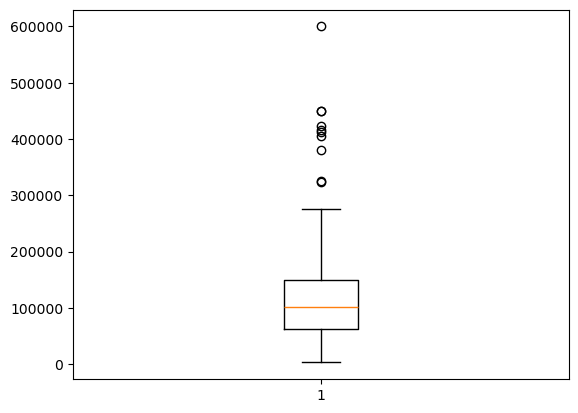

In [103]:
#boxplot using matplotlib

plt.boxplot(df.salary_in_usd)

In [104]:
import pandas as pd

def calculate_average_salaries(csv_file):
    """
    Calculates and displays average salaries (truncated to whole numbers) in USD by experience level and location.

    Args:
        csv_file (str): Path to the CSV file containing salary data.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary_in_usd is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'experience_level', 'company_location'])

        # Calculate average salaries by experience level and location
        average_salaries = df.groupby(['experience_level', 'company_location'])['salary_in_usd'].mean().reset_index()

        # Rename the average salary column
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Truncate average salaries to whole numbers
        average_salaries['average_salary_usd'] = average_salaries['average_salary_usd'].astype(int)

        # Display the results as a table
        print(average_salaries.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace 'r project data-1.csv' with your actual file path)
calculate_average_salaries("r project data-1.csv")

experience_level company_location  average_salary_usd
              EN               AS               18053
              EN               AU              118351
              EN               CA               57132
              EN               CH                5882
              EN               CN              100000
              EN               CO               21844
              EN               CZ               31875
              EN               DE               57551
              EN               DK               37252
              EN               DZ              100000
              EN               ES               10354
              EN               FR               47325
              EN               GB               65604
              EN               IN               19629
              EN               IQ              100000
              EN               IT               21669
              EN               JP               41689
              EN            

DataFrame length after cleaning: 607
First few rows of DataFrame:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  


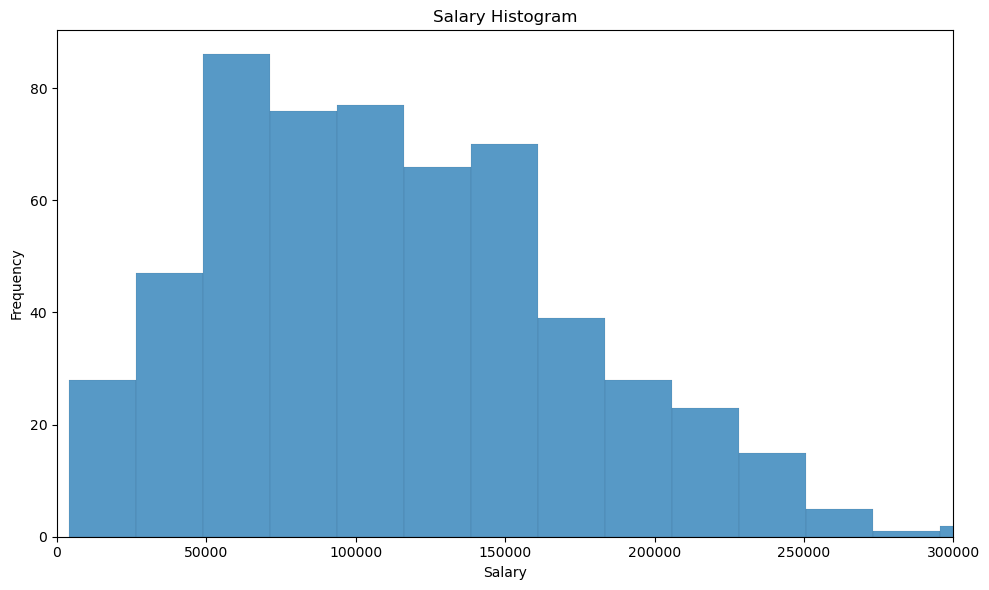

Graph code ran successfully.


In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def create_adjusted_histogram(csv_file, x_axis_max):
    """
    Creates a histogram of salary with an adjusted x-axis range.
    Includes debugging prints and backend selection.
    """
    try:
        #matplotlib.use('TkAgg') # Try a different backend if needed (e.g., 'Qt5Agg')
        df = pd.read_csv(csv_file)
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary'])

        print(f"DataFrame length after cleaning: {len(df)}")
        print("First few rows of DataFrame:")
        print(df.head())
        print("DataFrame data types:")
        print(df.dtypes)

        if df.empty:
            print("DataFrame is empty after cleaning. No histogram to display.")
            return

        plt.figure(figsize=(10, 6))
        sns.histplot(df, x="salary")
        plt.xlim(0, x_axis_max)
        plt.title("Salary Histogram")
        plt.xlabel("Salary")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        print("Graph code ran successfully.")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

create_adjusted_histogram("r project data-1.csv", 300000)



Work Year Counts:
--------------------
work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

Work Year Counts (sorted by year):
--------------------
work_year
2020     72
2021    217
2022    318
Name: count, dtype: int64


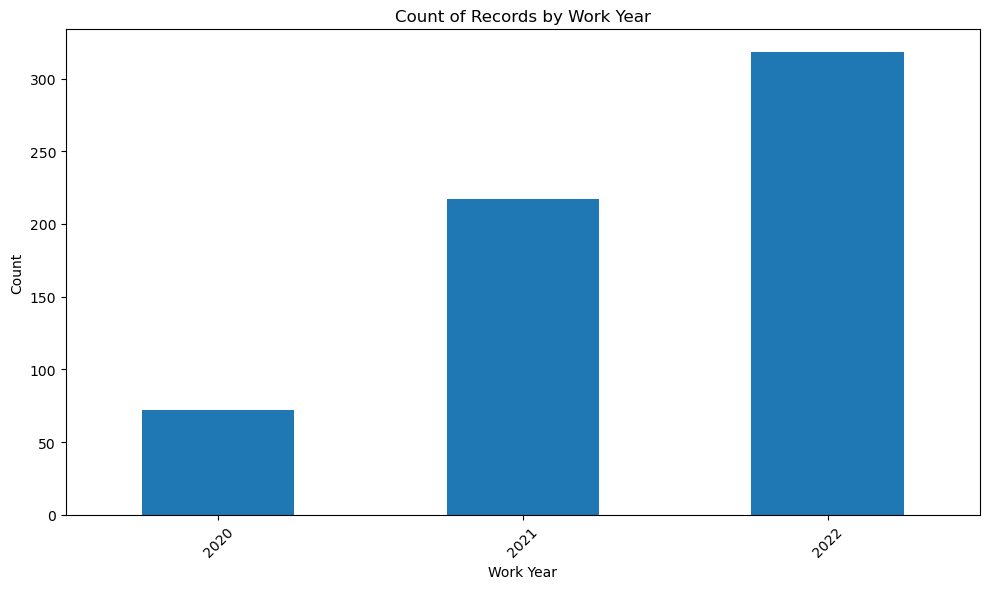

In [143]:
# Assuming df is your DataFrame with the data already loaded
# If not, uncomment the following lines to load your data
# import pandas as pd
# df = pd.read_csv("r project data-1.csv")

# Get counts of each work_year value
work_year_counts = df['work_year'].value_counts()

# Display the counts
print("Work Year Counts:")
print("-" * 20)
print(work_year_counts)

# Optional: Sort by work_year (instead of by count)
work_year_counts_sorted = df['work_year'].value_counts().sort_index()
print("\nWork Year Counts (sorted by year):")
print("-" * 20)
print(work_year_counts_sorted)

# Optional: Create a bar plot of the counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
work_year_counts_sorted.plot(kind='bar')
plt.title('Count of Records by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DataFrame length after cleaning: 607
First few rows of DataFrame:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  


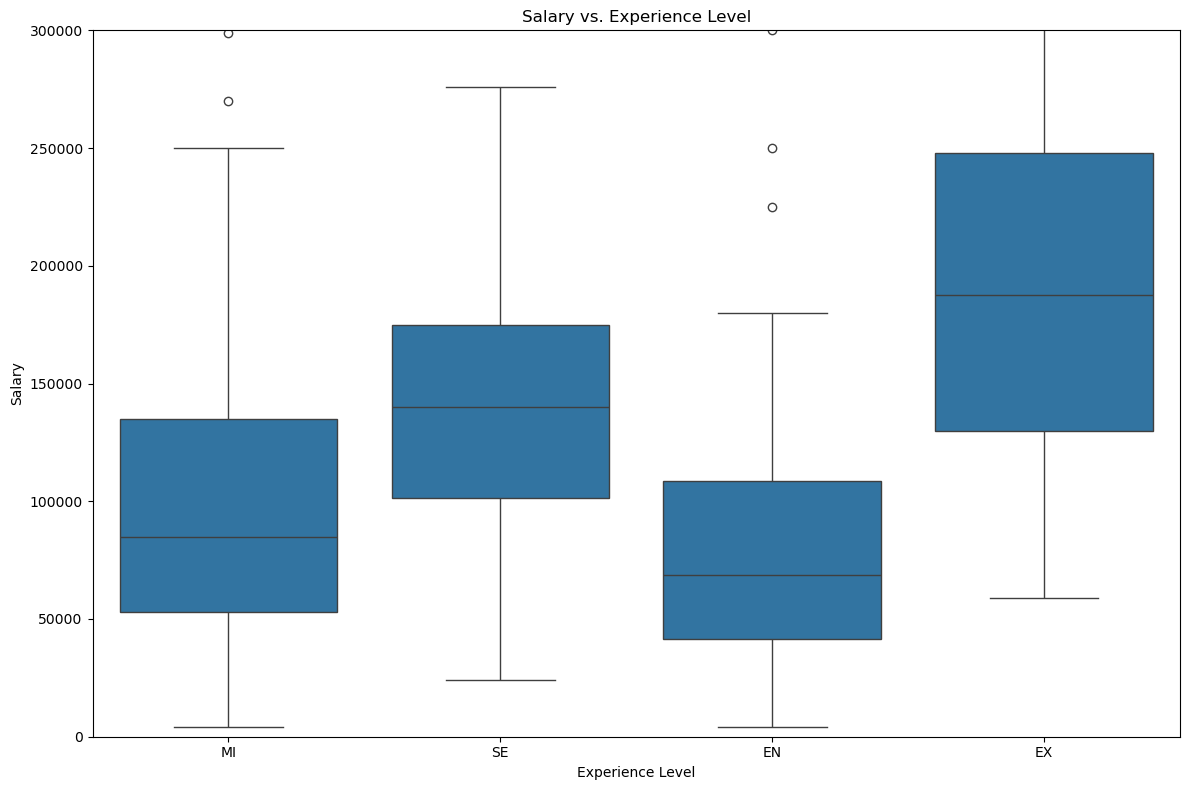

Boxplot code ran successfully.
An error occurred: name 'filename' is not defined


<Figure size 640x480 with 0 Axes>

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def create_salary_boxplot_by_level(csv_file, y_axis_max):
    """
    Creates a boxplot of salary versus experience level with adjusted y-axis.
    Includes debugging prints and backend selection.
    """
    try:
        #matplotlib.use('TkAgg') # Try a different backend if needed (e.g., 'Qt5Agg')
        df = pd.read_csv(csv_file)
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary', 'experience_level'])
        df.shape

        print(f"DataFrame length after cleaning: {len(df)}")
        print("First few rows of DataFrame:")
        print(df.head())
        print("DataFrame data types:")
        print(df.dtypes)

        if df.empty:
            print("DataFrame is empty after cleaning. No boxplot to display.")
            return

        plt.figure(figsize=(12, 8))
        sns.boxplot(x="experience_level", y="salary", data=df)
        plt.ylim(0, y_axis_max) #adjust the y axis.
        plt.title("Salary vs. Experience Level")
        plt.xlabel("Experience Level")
        plt.ylabel("Salary")
        plt.tight_layout()
        plt.show()

        print("Boxplot code ran successfully.")
        # Save the Matplotlib boxplot as a PNG file
        plt.savefig('matplotlib_boxplot.png')
        import os
        os.path.abspath(filename)
        

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

create_salary_boxplot_by_level("r project data-1.csv", 300000) #adjust 300000 as needed.

        

Salary Analysis for the United States by Experience Level:
experience_level          Q1          Q3     Average   N
              EN  $70,000.00 $102,500.00  $93,112.90  31
              EX $163,406.25 $268,500.00 $243,742.19  16
              MI  $87,750.00 $150,000.00 $125,780.21  90
              SE $115,233.50 $180,000.00 $151,527.63 218




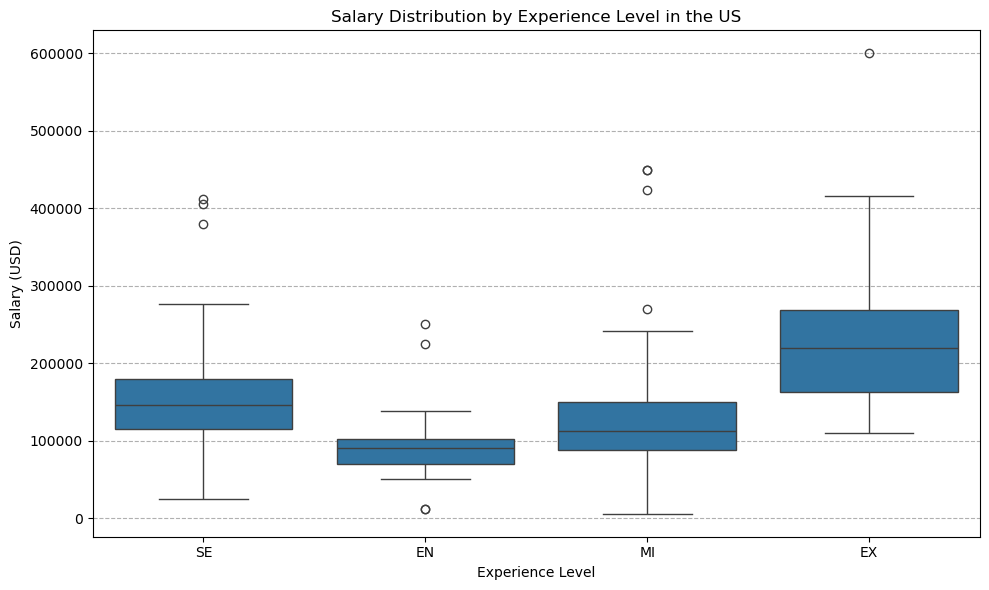

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_us_salary_by_experience_level_with_boxplots(csv_file):
    """
    Analyzes the salary distribution (including box plots), average salary,
    and quartile range (Q1, Q3) by experience level for data located in
    the United States (US).
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'experience_level', 'company_location'])

        # Filter data for the United States
        us_data = df[df['company_location'] == 'US'].copy()

        if us_data.empty:
            print("No data found for the United States.")
            return

        # Calculate Q1, Q3, and average salary for each experience level in the US
        salary_info_us = us_data.groupby('experience_level')['salary_in_usd'].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75),
            Average='mean',
            N='count'
        ).reset_index()

        # Format the salary columns as US dollars
        salary_info_us['Q1'] = salary_info_us['Q1'].apply(lambda x: f"${x:,.2f}")
        salary_info_us['Q3'] = salary_info_us['Q3'].apply(lambda x: f"${x:,.2f}")
        salary_info_us['Average'] = salary_info_us['Average'].apply(lambda x: f"${x:,.2f}")

        # Print the results table
        print("Salary Analysis for the United States by Experience Level:")
        print(salary_info_us.to_string(index=False))
        print("\n")

        # Create box plots
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='experience_level', y='salary_in_usd', data=us_data)
        plt.title('Salary Distribution by Experience Level in the US')
        plt.xlabel('Experience Level')
        plt.ylabel('Salary (USD)')
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
analyze_us_salary_by_experience_level_with_boxplots("r project data-1.csv")

In [108]:
import pandas as pd

def calculate_and_sort_average_salary_by_location(csv_file):
    """
    Calculates and prints the average salary by location, sorted from highest to lowest,
    and formats the salaries as US dollars.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location'])

        # Calculate average salary by location
        average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

        # Rename the average salary column
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Sort average salaries from highest to lowest BEFORE formatting.
        sorted_salaries = average_salaries.sort_values(by='average_salary_usd', ascending=False)

        # Format average salary as US dollars AFTER sorting.
        sorted_salaries['average_salary_usd'] = sorted_salaries['average_salary_usd'].apply(lambda x: f"${x:,.2f}")

        # Print the sorted table
        print(sorted_salaries.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_by_location("r project data-1.csv")
        
        

company_location average_salary_usd
              RU        $157,500.00
              US        $144,055.26
              NZ        $125,000.00
              IL        $119,059.00
              JP        $114,127.33
              AU        $108,042.67
              AE        $100,000.00
              DZ        $100,000.00
              IQ        $100,000.00
              CA         $99,823.73
              SG         $89,294.00
              BE         $85,699.00
              DE         $81,887.21
              GB         $81,583.04
              AT         $72,920.75
              CN         $71,665.50
              IE         $71,444.00
              PL         $66,082.50
              CH         $64,114.00
              FR         $63,970.67
              SI         $63,831.00
              RO         $60,000.00
              NL         $54,945.75
              DK         $54,386.33
              ES         $53,060.14
              GR         $52,293.09
              CZ         $50

In [109]:
import pandas as pd

def analyze_salary_by_location_with_iqr_mean_and_count(csv_file):
    """
    Calculates and prints the average salary, lower quartile (Q1),
    upper quartile (Q3), and the count of data points for each company location,
    sorted by average salary from highest to lowest. Also counts the total
    number of unique countries.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location'])

        # Calculate Q1, Q3, average salary, and count for each company location
        salary_info = df.groupby('company_location')['salary_in_usd'].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75),
            Average='mean',
            N='count'
        ).reset_index()

        # Rename the average salary column
        salary_info = salary_info.rename(columns={'Average': 'average_salary_usd'})

        # Sort by average salary from highest to lowest
        sorted_salary_info = salary_info.sort_values(by='average_salary_usd', ascending=False)

        # Format the salary columns as US dollars
        sorted_salary_info['Q1'] = sorted_salary_info['Q1'].apply(lambda x: f"${x:,.2f}")
        sorted_salary_info['Q3'] = sorted_salary_info['Q3'].apply(lambda x: f"${x:,.2f}")
        sorted_salary_info['average_salary_usd'] = sorted_salary_info['average_salary_usd'].apply(lambda x: f"${x:,.2f}")

        # Print the sorted table with Q1, Q3, Average Salary, and Count
        print("Salary Information by Company Location (USD - Sorted by Average Salary):")
        print(sorted_salary_info.to_string(index=False))
        print("\n")

        # Count the number of unique countries
        num_countries = df['company_location'].nunique()
        print(f"Total number of unique countries listed: {num_countries}")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
analyze_salary_by_location_with_iqr_mean_and_count("r project data-1.csv")
       

Salary Information by Company Location (USD - Sorted by Average Salary):
company_location          Q1          Q3 average_salary_usd   N
              RU $121,250.00 $193,750.00        $157,500.00   2
              US $100,000.00 $170,000.00        $144,055.26 355
              NZ $125,000.00 $125,000.00        $125,000.00   1
              IL $119,059.00 $119,059.00        $119,059.00   1
              JP  $66,283.25 $145,341.00        $114,127.33   6
              AU  $87,064.00 $118,712.50        $108,042.67   3
              AE  $90,000.00 $117,500.00        $100,000.00   3
              DZ $100,000.00 $100,000.00        $100,000.00   1
              IQ $100,000.00 $100,000.00        $100,000.00   1
              CA  $69,730.00 $117,916.25         $99,823.73  30
              SG  $89,294.00  $89,294.00         $89,294.00   1
              BE  $84,221.50  $87,176.50         $85,699.00   2
              DE  $58,986.00  $90,734.00         $81,887.21  28
              GB  $57,575.00 $1

In [110]:
import pandas as pd

def calculate_and_sort_average_salary_and_level_counts(csv_file):
    """
    Calculates average salary by location, counts occurrences of each experience level,
    sorts by average salary (highest to lowest), and formats salaries as US dollars.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location', 'experience_level'])

        # Calculate average salary by location
        average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Count occurrences of each experience level by location
        level_counts = df.groupby(['company_location', 'experience_level']).size().unstack(fill_value=0)

        # Merge average salaries and level counts
        result = pd.merge(average_salaries, level_counts, on='company_location')

        # Sort average salaries from highest to lowest BEFORE formatting.
        result_sorted = result.sort_values(by='average_salary_usd', ascending=False)

        # Format average salary as US dollars AFTER sorting.
        result_sorted['average_salary_usd'] = result_sorted['average_salary_usd'].apply(lambda x: f"${x:,.2f}")

        # Print the sorted table
        print(result_sorted.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_and_level_counts("r project data-1.csv")

company_location average_salary_usd  EN  EX  MI  SE
              RU        $157,500.00   0   2   0   0
              US        $144,055.26  31  16  90 218
              NZ        $125,000.00   0   0   0   1
              IL        $119,059.00   0   0   1   0
              JP        $114,127.33   1   0   3   2
              AU        $108,042.67   2   0   1   0
              AE        $100,000.00   0   0   1   2
              DZ        $100,000.00   1   0   0   0
              IQ        $100,000.00   1   0   0   0
              CA         $99,823.73   3   2  10  15
              SG         $89,294.00   0   0   1   0
              BE         $85,699.00   0   0   1   1
              DE         $81,887.21  11   2   8   7
              GB         $81,583.04   5   0  30  12
              AT         $72,920.75   0   0   3   1
              CN         $71,665.50   1   0   1   0
              IE         $71,444.00   0   0   0   1
              PL         $66,082.50   0   1   3   0
            

In [111]:
import pandas as pd
import os

def calculate_and_sort_average_salary_per_level_by_location(csv_file):
    """
    Calculates average salary per experience level by location,
    sorts by overall average salary (highest to lowest), and formats salaries as US dollars,
    truncating decimals.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location', 'experience_level'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate overall average salary by location
        overall_average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
        overall_average_salaries = overall_average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Calculate average salary per experience level by location
        level_average_salaries = df.groupby(['company_location', 'experience_level'])['salary_in_usd'].mean().unstack(fill_value=0)

        # Merge overall and level average salaries
        result = pd.merge(overall_average_salaries, level_average_salaries, on='company_location')

        # Sort overall average salaries from highest to lowest BEFORE formatting.
        result_sorted = result.sort_values(by='average_salary_usd', ascending=False)

        # Truncate and format average salaries as US dollars AFTER sorting.
        result_sorted['average_salary_usd'] = result_sorted['average_salary_usd'].apply(lambda x: f"${int(x):,}")
        for col in level_average_salaries.columns:
            result_sorted[col] = result_sorted[col].apply(lambda x: f"${int(x):,}")

        # Print the sorted table
        print(result_sorted.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_per_level_by_location("r project data-1.csv")
       


Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

In [112]:
import pandas as pd
import os

def list_unique_job_titles(csv_file):
    """
    Reads a CSV file and prints a list of unique job titles found in the 'job_title' column.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())

        if 'job_title' in df.columns:
            unique_titles = df['job_title'].unique()
            print("\nUnique Job Titles:")
            for title in unique_titles:
                print(f"- {title}")
        else:
            print("Error: 'job_title' column not found in the CSV file.")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
list_unique_job_titles("r project data-1.csv")

Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

In [113]:
import pandas as pd
import os

def list_job_titles_by_experience_level(csv_file):
    """
    Reads a CSV file and creates a table listing job titles for each experience level.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())

        if 'experience_level' in df.columns and 'job_title' in df.columns:
            job_titles_by_level = df.groupby('experience_level')['job_title'].apply(list).reset_index()
            job_titles_by_level['job_title'] = job_titles_by_level['job_title'].apply(lambda x: ', '.join(set(x))) # Get unique titles and join with comma

            print("\nJob Titles by Experience Level:")
            print(job_titles_by_level.to_string(index=False))
        else:
            print("Error: Both 'experience_level' and 'job_title' columns are required but not found.")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
list_job_titles_by_experience_level("r project data-1.csv")

Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

In [114]:
import pandas as pd
import os

def calculate_and_sort_average_salary_by_company_size(csv_file):
    """
    Calculates the average salary for each company size and sorts the results
    first by company size (alphabetically) and then by average salary
    (highest to lowest). Formats salaries as US dollars, truncating decimals.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_size'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate average salary per company size
        average_salaries_by_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
        average_salaries_by_size = average_salaries_by_size.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Sort first by company size (alphabetically) and then by average salary (descending)
        sorted_results = average_salaries_by_size.sort_values(by=['company_size', 'average_salary_usd'], ascending=[True, False])

        # Truncate and format average salaries as US dollars AFTER sorting.
        sorted_results['average_salary_usd'] = sorted_results['average_salary_usd'].apply(lambda x: f"${int(x):,}")

        # Print the sorted table
        print("\nAverage Salary by Company Size (Sorted):")
        print(sorted_results.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_by_company_size("r project data-1.csv")

Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

In [115]:
import pandas as pd
import os

def calculate_and_sort_average_salary_by_company_size_location(csv_file):
    """
    Calculates the average salary for each combination of company size and location
    and sorts the results first by company size (alphabetically), then by location
    (alphabetically), and finally by average salary (highest to lowest).
    Formats salaries as US dollars, truncating decimals.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_size', 'company_location'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate average salary per company size and location
        average_salaries_by_size_location = df.groupby(['company_size', 'company_location'])['salary_in_usd'].mean().reset_index()
        average_salaries_by_size_location = average_salaries_by_size_location.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Sort by company size, then location, then average salary (descending)
        sorted_results = average_salaries_by_size_location.sort_values(
            by=['company_size', 'company_location', 'average_salary_usd'],
            ascending=[True, True, False]
        )

        # Truncate and format average salaries as US dollars AFTER sorting.
        sorted_results['average_salary_usd'] = sorted_results['average_salary_usd'].apply(lambda x: f"${int(x):,}")

        # Print the sorted table
        print("\nAverage Salary by Company Size and Location (Sorted):")
        print(sorted_results.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_by_company_size_location("r project data-1.csv")

Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

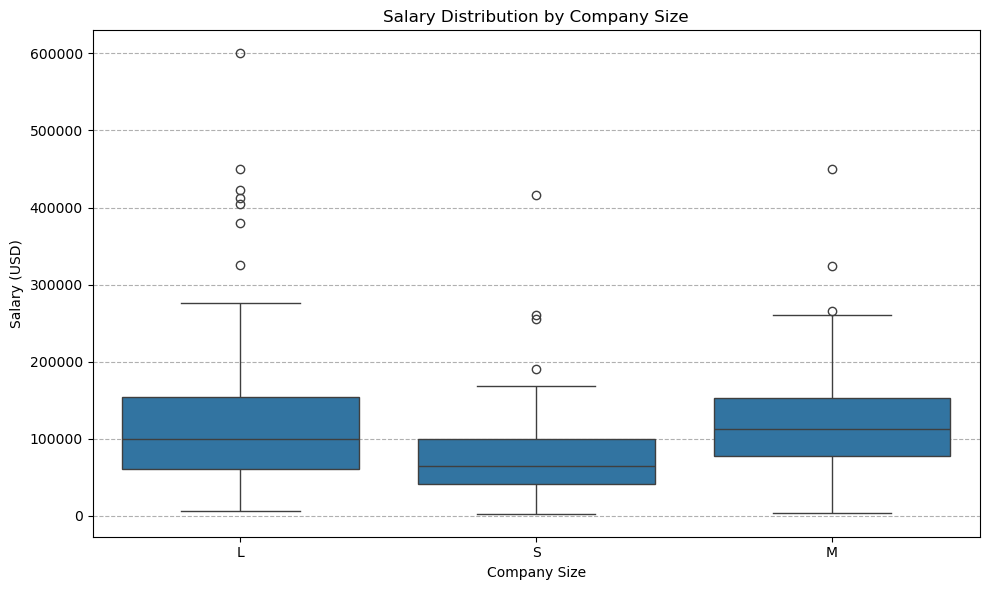

In [116]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_salary_by_company_size_with_iqr_details(csv_file):
    """
    Generates a box plot of salary distribution for each company size
    and prints the interquartile range (IQR), the first quartile (Q1),
    and the third quartile (Q3) for each size.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_size'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate Q1, Q3, and IQR for each company size
        quartile_info = df.groupby('company_size')['salary_in_usd'].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75),
            IQR=lambda x: x.quantile(0.75) - x.quantile(0.25)
        ).reset_index()

        print("\nSalary Quartile Information by Company Size:")
        for index, row in quartile_info.iterrows():
            print(f"Company Size: {row['company_size']}, Q1 (Bottom of Box): ${int(row['Q1']):,}, Q3 (Top of Box): ${int(row['Q3']):,}, IQR: ${int(row['IQR']):,}")

        # Create box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='company_size', y='salary_in_usd', data=df)
        plt.title('Salary Distribution by Company Size')
        plt.xlabel('Company Size')
        plt.ylabel('Salary (USD)')
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
analyze_salary_by_company_size_with_iqr_details("r project data-1.csv")


Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

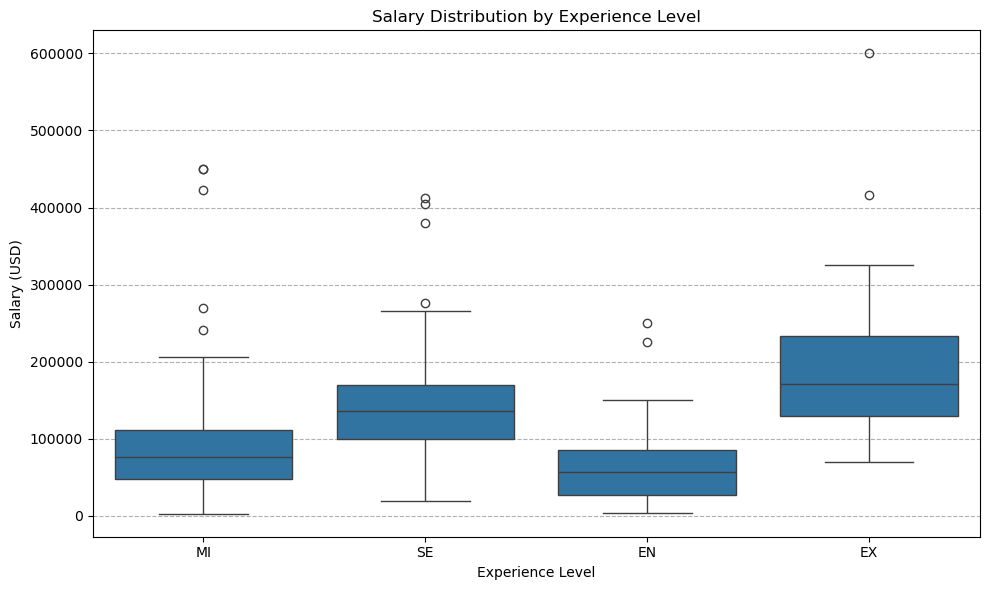

In [117]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_salary_by_experience_level_with_iqr_and_mean(csv_file):
    """
    Generates a box plot of salary distribution for each experience level
    and prints the interquartile range (IQR), the first quartile (Q1),
    the third quartile (Q3), and the average salary for each experience level.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'experience_level'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate Q1, Q3, IQR, and mean salary for each experience level
        salary_info = df.groupby('experience_level')['salary_in_usd'].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75),
            IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
            Average='mean'
        ).reset_index()

        print("\nSalary Information by Experience Level:")
        for index, row in salary_info.iterrows():
            print(f"Experience Level: {row['experience_level']}, "
                  f"Q1 (Bottom of Box): ${int(row['Q1']):,}, "
                  f"Q3 (Top of Box): ${int(row['Q3']):,}, "
                  f"IQR: ${int(row['IQR']):,}, "
                  f"Average Salary: ${int(row['Average']):,}")

        # Create box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
        plt.title('Salary Distribution by Experience Level')
        plt.xlabel('Experience Level')
        plt.ylabel('Salary (USD)')
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
analyze_salary_by_experience_level_with_iqr_and_mean("r project data-1.csv")

     

Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       

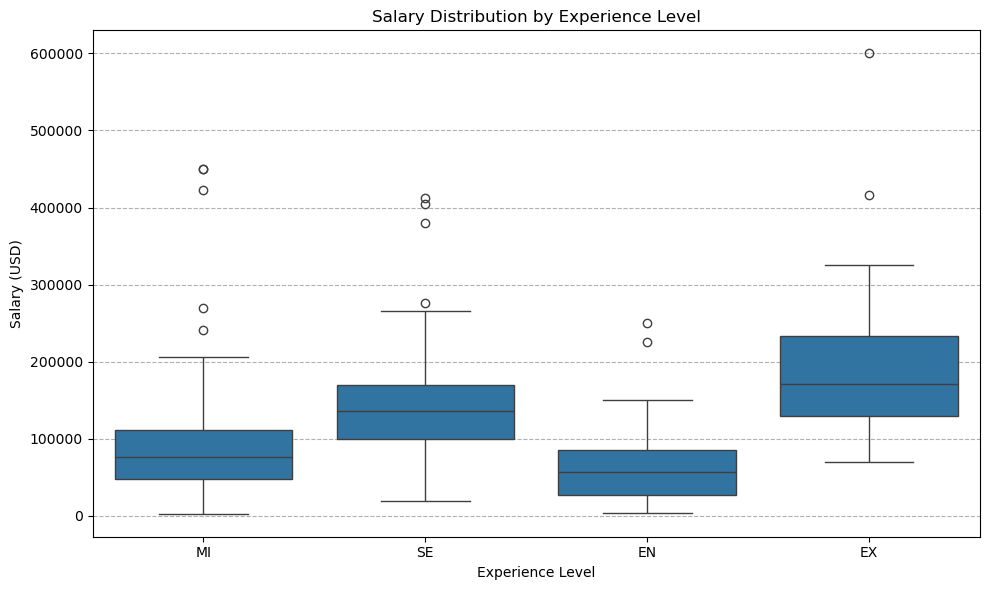

In [118]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_salary_by_experience_level_with_iqr_and_mean(csv_file):
    """
    Generates a box plot of salary distribution for each experience level
    and prints the interquartile range (IQR), the first quartile (Q1),
    the third quartile (Q3), and the average salary for each experience level.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'experience_level'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate Q1, Q3, IQR, and mean salary for each experience level
        salary_info = df.groupby('experience_level')['salary_in_usd'].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75),
            IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
            Average='mean'
        ).reset_index()

        print("\nSalary Information by Experience Level:")
        for index, row in salary_info.iterrows():
            print(f"Experience Level: {row['experience_level']}, "
                  f"Q1 (Bottom of Box): ${int(row['Q1']):,}, "
                  f"Q3 (Top of Box): ${int(row['Q3']):,}, "
                  f"IQR: ${int(row['IQR']):,}, "
                  f"Average Salary: ${int(row['Average']):,}")

        # Create box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
        plt.title('Salary Distribution by Experience Level')
        plt.xlabel('Experience Level')
        plt.ylabel('Salary (USD)')
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
analyze_salary_by_experience_level_with_iqr_and_mean("r project data-1.csv")
 
        